### Exercise 1. (EM for Gaussian random walk)

1. Implement the $EM$ algorithm for estimation of the measurement noise variance in the Gaussian random walk model. 
2. Simulate data with 256 time steps and test the algorithm. How many iterations are needed for convergence?

### Solution Exercise 1.

Recall that the random walk can be written in state space form in the following way:

$$
x_k = x_{k - 1} + q  \qquad q \sim \mathcal{N}(0, Q)
$$
$$
y_k = x_{k} + r \qquad r \sim \mathcal{N}(0, R)
$$

In order to derive the $EM$ algorithm for the random walk we should write down the complete data log-likelihood for the model given a set of parameters $\mathbf{\theta}$ which is:

$$
 \log p(\mathbf{y}_{1:T}, \mathbf{x}_{0:T} | \theta) = \log(x_0|\theta) + \sum_{k=1}^T \log p(x_k|x_{k-1}, \theta) + \sum_{k=1}^T \log p(y_k | x_k,\theta)
$$

To make the $E$ step we define the function $Q(\theta, \theta^{(n)})$:

$$
\begin{align}
Q(\theta, \theta^{(n)})& = E[\log p(\mathbf{y}_{1:k}, \mathbf{x}_{0:k} | \theta)] \\
                       & = E[\log(x_0|\theta)] + \sum_{k=1}^T E[ \log p(x_k|x_{k-1}, \theta) ] + \sum_{k=1}^T E[\log p(y_k | x_k,\theta)]
\end{align}
$$

where the expectation $E[.]$ is defined in terms of $p(\mathbf{x}_{0:T} | \theta^{(n)}, \mathbf{y}_{1:T})$. Formally,

$$
E[g(x)] = \int g(\mathbf{x}_{0:T}) p(\mathbf{x}_{0:T} | \theta^{(n)}, \mathbf{y}_{1:T}) d\mathbf{x}_{0:T}
$$

Recall that in this case the parameter we want to estimate is the measurement noise variance ($R$) and it only affects $ p(y_k | x_k)$. Then the function $Q(.,.)$ can be rewritten as follows:


$$
\begin{align}
Q(R, R^{(n)})& =  \sum_{k=1}^T E[\log p(y_k | x_k, R)] + constant \\
                       & = \sum_{k=1}^T \int \log p(y_k | x_k, R) p(x_k | R^{(n)}, \mathbf{y}_{1:T}) d{x}_{k} + constant
\end{align}
$$

Now we need to derive the $M$ step. In this step we have to optimize $Q(.,.)$ with respect to $R$. Expanding the last expression we get:



$$
\begin{align}
Q(R, R^{(n)}) & = \sum_{k=1}^T \int \bigg(-\frac{1}{2}\log 2\pi - \frac{1}{2}\log R - \frac{(y_k - x_k)^2}{2R}\bigg) \mathcal{N}(x_k | m_k^s, P_k^s) d{x}_{k} + constant \\
              & = \sum_{k=1}^T \int \bigg(-\frac{1}{2}\log 2\pi - \frac{1}{2}\log R - \frac{(y_k - x_k)^2}{2R}\bigg) \mathcal{N}(x_k | m_k^s, P_k^s) d{x}_{k} + constant \\
              & = \sum_{k=1}^T -E[\frac{1}{2}\log 2\pi] - E[\frac{1}{2}\log R] - \frac{E[y_k^2]}{2R} + \frac{E[y_k x_k]}{2R} - \frac{E[x_k^2]}{2R} + constant\\
              & = \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{2 y_k E[x_k]}{2R} - \frac{E[x_k^2]}{2R} + constant \\
              & = \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{y_k m_k^s}{R} - \frac{P_k^s + (m_k^s)^2 }{2R} + constant \\
              & = \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{y_k m_k^s}{R} - \frac{P_k^s}{2R} - \frac{(m_k^s)^2 }{2R} + constant
\end{align}
$$

Recall that the the expectation above $E[.]$ is defined in terms of the probability distribution $\mathcal{N}(x_k | m_k^s, P_k^s)$ where $m_k^s$ and $P_k^s$ are the resulting mean and covariance from the $RTS$ smoother for state $x_k
$.

Now we have to maximize $Q(R, R^{(n)})$ with respect to $R$. Taking derivatives we have.

$$
\begin{align}
\frac{\partial Q(R, R^{(n)})}{\partial R} & = \frac{\partial }{\partial R} \bigg( \sum_{k=1}^T - \frac{1}{2}\log R - \frac{y_k^2}{2R} +  \frac{y_k m_k^s}{R} - \frac{P_k^s}{2R} - \frac{(m_k^s)^2 }{2R} \bigg) \\
                                          & = \sum_{k=1}^T - \frac{1}{2R} + \frac{y_k^2}{2 R^2} -  \frac{y_k m_k^s}{R^2} + \frac{P_k^s}{2R^2} + \frac{(m_k^s)^2 }{2R^2}
\end{align}
$$

Now we have to make the derivative equal to $0$ in order to maximize:

$$
\begin{align}
\sum_{k=1}^T - \frac{1}{2R} + \frac{y_k^2}{2 R^2} -  \frac{y_k m_k^s}{R^2} + \frac{P_k^s}{2R^2} + \frac{(m_k^s)^2 }{2R^2}
& = 0 \\
\sum_{k=1}^T - \frac{R}{2} + \frac{y_k^2}{2} - {y_k m_k^s} + \frac{P_k^s}{2} + \frac{(m_k^s)^2 }{2}
& = 0 \\
 -\frac{RT}{2} + \sum_{k=1}^T  \frac{y_k^2}{2} - {y_k m_k^s} + \frac{P_k^s}{2} + \frac{(m_k^s)^2 }{2}
& = 0 \\
\end{align}
$$

The last equality defines an update equation for $R$ using the output (i.e $m_k^s$, $P_k^s$) of the *RTS* smoother using the old value of $R$ (i.e. $R^{(n)}$). Namely,

$$
\begin{align}
R = \frac{1}{T} \sum_{k=1}^T  {y_k^2} - 2{y_k m_k^s} + {P_k^s} + {(m_k^s)^2 }
\end{align}
$$

Now we are able to iteratively estimate the value of $R$. The implementation is based on the EFK/UKF toolbox since the Kalman filtering and RTS smoothing were already implemented in previous rounds.

In [ ]:
%%script octave
   
%% Data Generation

A = 1;
H = 1;
steps = 256;
T = 1:steps;
x = randn;

Q = 0.1;
R = 3.0;

X = zeros(1, steps);
Y = zeros(1, steps);
for i = 1:steps
    x = A * x + sqrt(Q) * randn;
    y = H * x + sqrt(R) *randn;
    X(i) = x;
    Y(i) = y;
end


%% EM


em_iteraciones = 100;

R_est = 100; % initial estimation

est = zeros(1, em_iteraciones);

for i = 1:em_iteraciones

    % Kalman Filtering with current parameter value
    m0 = 0.0;
    P0 = 1;
    m = m0;
    P = P0;
    MM = zeros(size(m,1),size(Y,2));
    PP = zeros(size(m,1),size(m,1),size(Y,2));
    for k=1:size(Y,2)
        [m,P] = kf_predict(m,P,A,Q);
        [m,P] = kf_update(m,P,Y(:,k),H,R_est); % using the current estimate
        MM(:,k) = m;
        PP(:,:,k) = P;
    end
    % RTS Smoothing 
    [SM,SP] = rts_smooth(MM,PP,A,Q);
    % Actual EM
    new_R_est = sum(Y .* Y) - 2 * sum(Y .* SM) + sum(SP) + sum(SM .* SM);
    new_R_est = new_R_est / size(Y, 2);
    R_est = new_R_est;
    est(i) = R_est;
end

time = 1:em_iteraciones;
plot(time , est, time, R );
legend('EM Estimation','Real Value');

In [3]:
from IPython.display import Image

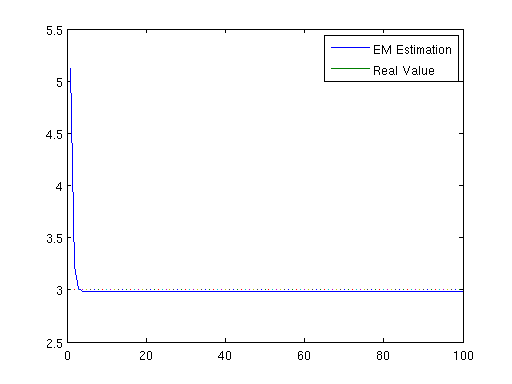

In [6]:
Image(filename='em_convergence_8_1.png') 

Real Value | EM Estimate | Error
--- | --- | ---
3.0 | 2.9806 | 0.0194